In [1]:
%pylab inline

from scipy.optimize import curve_fit
def line(x,a,b):
    return a*x + b

f = (1,5,10,15,20,25,30,35,40)
r = (1.0,0.5,0.1,0.06)
count = 0;

def gain_integral(f,vout,vin,atten):
    global count
    g = (vout / vin) * atten
    plt.plot(f,g,"o-")
    plt.xlabel("f (kHz)")
    plt.ylabel("gain (10^3)")
    g2 = np.trapz(y=g*g,x=f)
    print("gain integral:  ", g2, " kHz x 10^6")
    plt.savefig("gain_"+str(count)+".pdf")
    plt.show()
    return g2

def do_fit(r,vrms,g2):
    global count
    fkt_exp = 16.4
    rf = np.linspace(0,1.0,100)
    sf = fkt_exp * rf
    plt.plot(rf, sf, "b--", label="theory")
    s = vrms**2/g2
    errs = 2 * vrms * 2.0 / g2

    par,cov = curve_fit(line, r, s, sigma=errs, absolute_sigma=True) # your data x, y to fit
    unc = np.diag(cov)**0.5
    sm = par[0] * rf + par[1]
    plt.plot(rf, sm, "r-", label="fit")
    plt.errorbar(r, s, yerr=errs, fmt="ko", label="measured")
    plt.ylabel("$S_{\\rm meas}\\;(\\rm \\mu V^2/ kHz)$")
    plt.xlabel("$R\;(\\rm M \\Omega)$")
    plt.legend()
    #plt.savefig("smeas.pdf")
    print("measured 4kT:  ", par[0])
    print("fractional uncertainty:  ", unc[0]/par[0])
    print("world:         ", fkt_exp)
    print("raio:          ", par[0]/fkt_exp)
    plt.savefig("fit_"+str(count)+".pdf")
    count = count + 1
    plt.show()




Populating the interactive namespace from numpy and matplotlib


gain integral:   223.1876509926123  kHz x 10^6


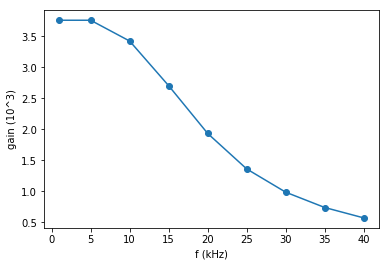

measured 4kT:   15.295244288379331
fractional uncertainty:   0.06610036863975968
world:          16.4
raio:           0.9326368468523983


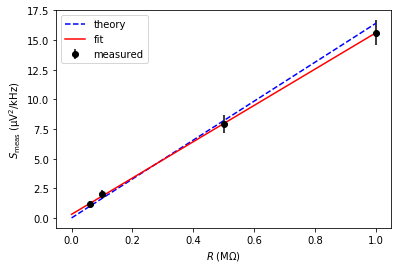

In [2]:
# Analysis for JN-A #1
vout = np.array([381,381,347,274,196,138,100,75,58])
vrms = np.array([59,42,21,16])
vin = 50.7
g2 = gain_integral(f,vout,vin,0.5)
do_fit(r,vrms,g2)

gain integral:   235.3638062292662  kHz x 10^6


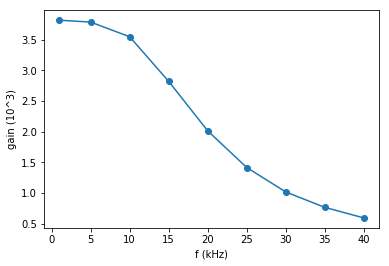

measured 4kT:   15.121055631657832
fractional uncertainty:   0.06496035039027208
world:          16.4
raio:           0.9220155872962094


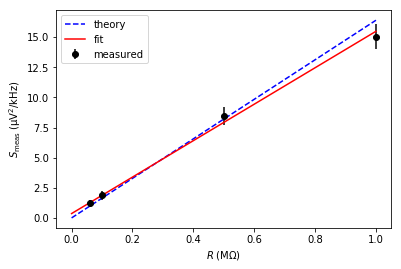

In [3]:
# Analysis for JN-A #2
vout = np.array([383,380,356,283,202,142,102,76.8,59.5])
vrms = np.array([59.5,44.6,21.0,17.0])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   257.9729389216044  kHz x 10^6


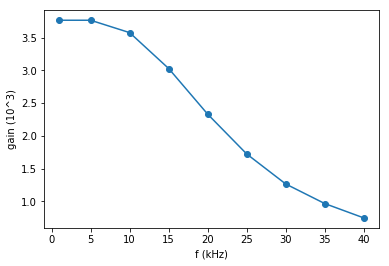

measured 4kT:   15.157563130881796
fractional uncertainty:   0.06187736918939434
world:          16.4
raio:           0.9242416543220608


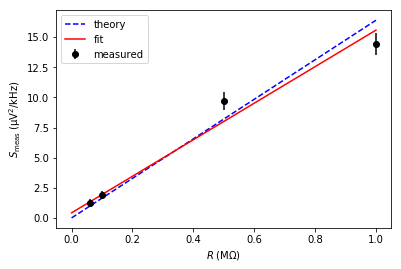

In [4]:
# Analysis for JN-A #3
vout = np.array([378,378,359,304,234,173,127,97,75])
vin = 50.3
vrms = np.array([61,50,22,18])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   234.76710687131947  kHz x 10^6


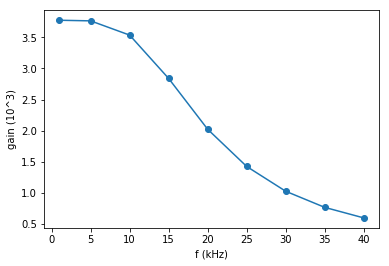

measured 4kT:   15.031215863006775
fractional uncertainty:   0.06525514140779534
world:          16.4
raio:           0.9165375526223644


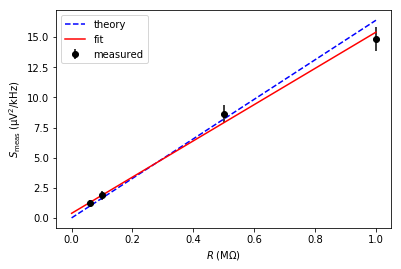

In [5]:
# Analysis for JN-A #4
vout = np.array([379,378,355,285,203,143,103,77,60])
vin = 50.4
vrms = np.array([59,45,21,17])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   217.18525549197628  kHz x 10^6


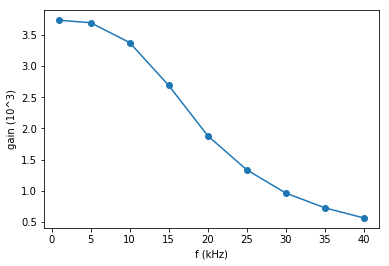

measured 4kT:   17.084569257194925
fractional uncertainty:   0.06283849397752798
world:          16.4
raio:           1.0417420278777394


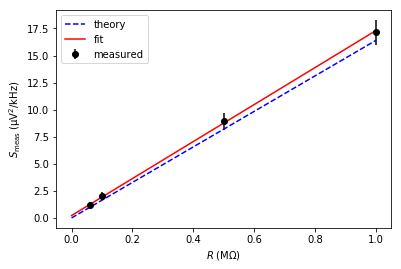

In [6]:
# Analysis for JN-A #5
vout = np.array([375,371,339,270,189,134,96.6,72.8,56.5])
vin = 50.4
vrms = np.array([61,44,21,16])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   236.89678536848618  kHz x 10^6


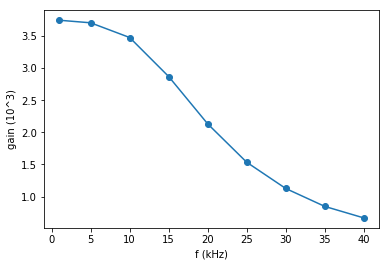

measured 4kT:   12.90655714122162
fractional uncertainty:   0.07031392689970423
world:          16.4
raio:           0.7869851915379038


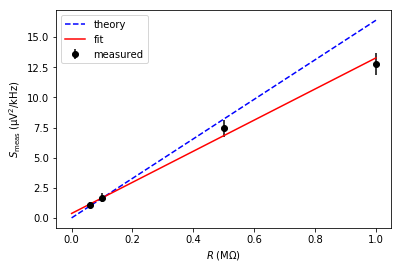

In [7]:
# Analysis for JN-A #6
vout = np.array([376,372,349,288,214,154,113,85,67])
vin = 50.4
vrms = np.array([55,42,20,16])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   132.033633394708  kHz x 10^6


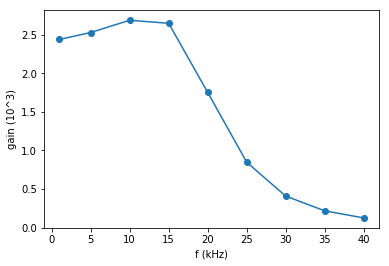

measured 4kT:   18.795828941938755
fractional uncertainty:   0.07919852457995247
world:          16.4
raio:           1.1460871306060216


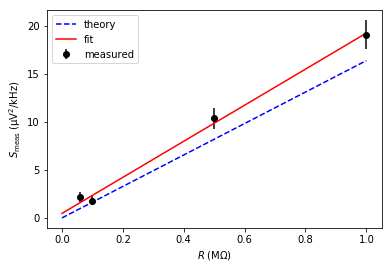

In [8]:
# Analysis for JN-B #7
vout = np.array([245,254,270,266,176,85.1,41.0,21.8,12.6])
vrms = np.array([50.2,37.0,15.4,17.0])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   79.91334214933096  kHz x 10^6


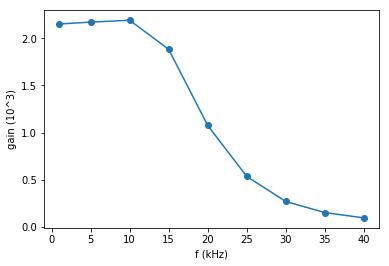

measured 4kT:   17.338068036154308
fractional uncertainty:   0.10207163742605511
world:          16.4
raio:           1.057199270497214


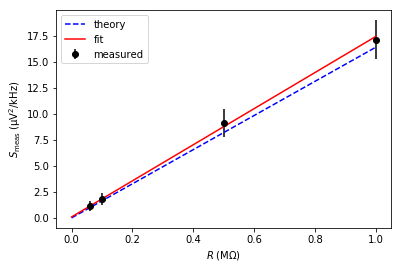

In [9]:
# Analysis for JN-B #8
vout = np.array([216,218,220,189,108,53.7,27.0,15.2,9.50])
vrms = np.array([37,27,12,9.5])
g2 = gain_integral(f,vout,50.2,0.5)
do_fit(r,vrms,g2)

gain integral:   100.43169989365248  kHz x 10^6


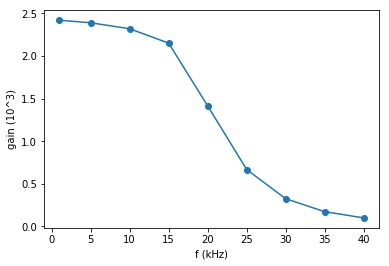

measured 4kT:   24.22257381582359
fractional uncertainty:   0.07539652922463919
world:          16.4
raio:           1.4769862082819263


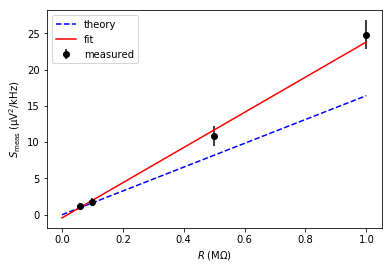

In [10]:
# Analysis for JN-B #9
vout = np.array([243,240,233,216,142,67.0,32.6,17.4,10.04]) 
vin=50.2
vrms = np.array([49.9,33,13.5,10.9])
g2 = gain_integral(f,vout,vin,0.500)
do_fit(r,vrms,g2)